c:\Users\THINKPAD\Desktop\10_Academy\Week_9\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\THINKPAD\Desktop\10_Academy\Week_9\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\THINKPAD\Desktop\10_Academy\Week_9\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


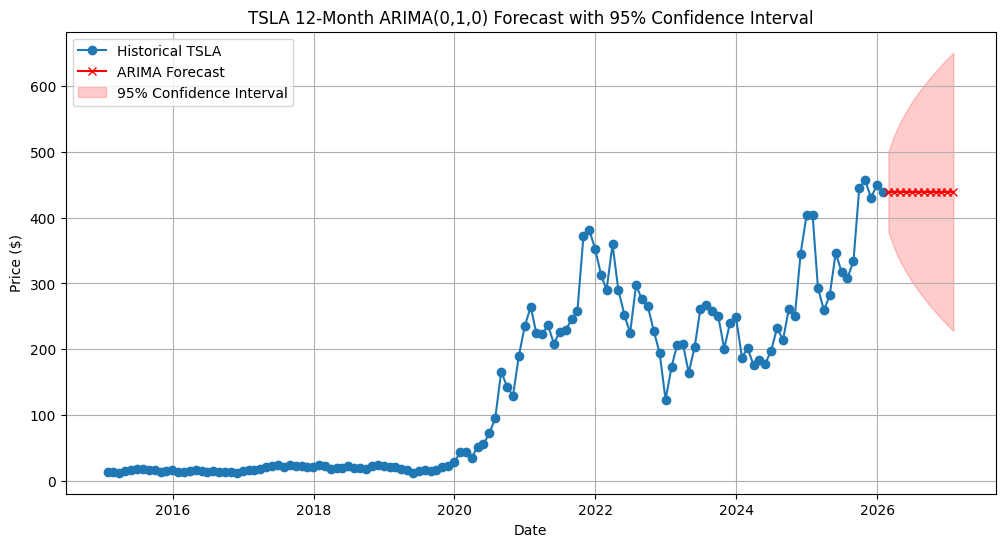

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pickle

processed_dir = r"C:\Users\THINKPAD\Desktop\10_Academy\Week_9\portfolio-optimization\data\processed"
os.makedirs(processed_dir, exist_ok=True)

# Load TSLA monthly prices
processed_path = os.path.join(processed_dir, "monthly_prices.csv")
df = pd.read_csv(processed_path, parse_dates=['Date'])
df.set_index('Date', inplace=True)
tsla_prices = df[['TSLA']].dropna()

# Train ARIMA(0,1,0)
arima_order = (0, 1, 0)
arima_model = ARIMA(tsla_prices, order=arima_order).fit()

# Save the model
arima_model_path = os.path.join(processed_dir, "arima_tsla_model.pkl")
with open(arima_model_path, "wb") as f:
    pickle.dump(arima_model, f)

# Forecast 12 months ahead with 95% CI
future_steps = 12
forecast_res = arima_model.get_forecast(steps=future_steps)
forecast_mean = forecast_res.predicted_mean
forecast_ci = forecast_res.conf_int(alpha=0.05)  # 95% CI

# Prepare forecast DataFrame
last_date = tsla_prices.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1),
                             periods=future_steps, freq='ME')

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast_mean.values,
    'Lower_95_CI': forecast_ci.iloc[:,0].values,
    'Upper_95_CI': forecast_ci.iloc[:,1].values
})
forecast_df.set_index('Date', inplace=True)
forecast_df.to_csv(os.path.join(processed_dir, "tsla_arima_forecast.csv"))

# Plot historical + forecast with CI
plt.figure(figsize=(12,6))
plt.plot(tsla_prices.index, tsla_prices['TSLA'], label='Historical TSLA', marker='o')
plt.plot(future_dates, forecast_mean, label='ARIMA Forecast', color='red', marker='x')
plt.fill_between(future_dates, 
                 forecast_ci.iloc[:,0], 
                 forecast_ci.iloc[:,1], 
                 color='red', alpha=0.2, label='95% Confidence Interval')
plt.title("TSLA 12-Month ARIMA(0,1,0) Forecast with 95% Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
processed_dir = r"C:\Users\THINKPAD\Desktop\10_Academy\Week_9\portfolio-optimization\data\processed"
os.makedirs(processed_dir, exist_ok=True)

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast_mean,
    'Lower_CI': forecast_ci.iloc[:,0],
    'Upper_CI': forecast_ci.iloc[:,1]
})
forecast_df.to_csv(os.path.join(processed_dir, "tsla_arima_forecast.csv"), index=False)

Trend Analysis

In [24]:
# Compute trend direction
forecast_slope = forecast_mean.diff().mean()

if forecast_slope > 0:
    trend = "upward"
elif forecast_slope < 0:
    trend = "downward"
else:
    trend = "stable"

# Examine CI width change
ci_width = forecast_ci.iloc[:,1] - forecast_ci.iloc[:,0]
ci_trend = "increasing" if ci_width.diff().mean() > 0 else "stable/decreasing"


Market Opportunites and Risks

In [25]:
# Opportunities
if trend == "upward":
    opportunities = "Potential price increase; buying opportunity for long-term investors."
else:
    opportunities = "Limited short-term growth opportunity."

# Risks
if ci_trend == "increasing":
    risks = "High uncertainty in the long-term; forecast becomes less reliable further out."
else:
    risks = "Relatively stable forecast; moderate risk."

# Print summary
print(f"Trend Analysis: The forecast shows a {trend} trend.")
print(f"Confidence Interval Trend: {ci_trend}, indicating forecast reliability.")
print(f"Market Opportunities: {opportunities}")
print(f"Market Risks: {risks}")


Trend Analysis: The forecast shows a stable trend.
Confidence Interval Trend: increasing, indicating forecast reliability.
Market Opportunities: Limited short-term growth opportunity.
Market Risks: High uncertainty in the long-term; forecast becomes less reliable further out.
